In [40]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 

In [41]:
import pandas 
from Bio import SeqIO 
from sklearn import preprocessing

record = next(SeqIO.parse('../rosetta_runs/bgl3/4mu_enzyme_design/bgl3.fasta', 'fasta'))
str(record[3])

'A'

In [42]:
df = pandas.read_hdf('../rosetta_runs/bgl3/enzyme_design/features__enzyme_design.h5')
def map_name(name):
    native, *pos, designed, _ = name
    pos = int(''.join(pos))
    native = str(record[pos-1])
    return native + str(pos) + designed
df['name'] = df.index.map(map_name)
df.iloc[:, 55:].head()

,SR_5_interf_E_1_2,SR_5_dsasa_1_2,SR_5_hbond_pm,SR_5_burunsat_pm,name
X1A\n,-6.125,0.929,4.1,0.6,M1A
X1R\n,-6.561,0.923,3.8,0.3,M1R
X1N\n,-5.887,0.923,3.8,0.4,M1N
X1D\n,-6.949,0.925,4.2,0.5,M1D
X1C\n,-5.652,0.924,3.6,0.3,M1C


In [43]:
df.set_index('name', inplace=True)
df.columns

Index(['total_score', 'fa_rep', 'hbond_sc', 'all_cst', 'tot_pstat_pm',
       'tot_nlpstat_pm', 'tot_burunsat_pm', 'tot_hbond_pm', 'tot_NLconts_pm',
       'tot_nlsurfaceE_pm', 'tot_total_charge', 'tot_total_pos_charges',
       'tot_total_neg_charges', 'tot_seq_recovery', 'SR_1', 'SR_1_total_score',
       'SR_1_fa_rep', 'SR_1_hbond_sc', 'SR_1_all_cst', 'SR_1_hbond_pm',
       'SR_1_burunsat_pm', 'SR_1_pstat_pm', 'SR_1_nlpstat_pm', 'SR_2',
       'SR_2_total_score', 'SR_2_fa_rep', 'SR_2_hbond_sc', 'SR_2_all_cst',
       'SR_2_hbond_pm', 'SR_2_burunsat_pm', 'SR_2_pstat_pm', 'SR_2_nlpstat_pm',
       'SR_3', 'SR_3_total_score', 'SR_3_fa_rep', 'SR_3_hbond_sc',
       'SR_3_all_cst', 'SR_3_hbond_pm', 'SR_3_burunsat_pm', 'SR_3_pstat_pm',
       'SR_3_nlpstat_pm', 'SR_4', 'SR_4_total_score', 'SR_4_fa_rep',
       'SR_4_hbond_sc', 'SR_4_all_cst', 'SR_4_hbond_pm', 'SR_4_burunsat_pm',
       'SR_4_pstat_pm', 'SR_4_nlpstat_pm', 'SR_5', 'SR_5_total_score',
       'SR_5_fa_rep', 'SR_5_hbond_sc', 

In [44]:
df.dtypes

total_score              float64
fa_rep                   float64
hbond_sc                 float64
all_cst                  float64
tot_pstat_pm             float64
tot_nlpstat_pm           float64
tot_burunsat_pm          float64
tot_hbond_pm             float64
tot_NLconts_pm           float64
tot_nlsurfaceE_pm        float64
tot_total_charge         float64
tot_total_pos_charges    float64
tot_total_neg_charges    float64
tot_seq_recovery         float64
SR_1                     float64
SR_1_total_score         float64
SR_1_fa_rep              float64
SR_1_hbond_sc            float64
SR_1_all_cst             float64
SR_1_hbond_pm            float64
SR_1_burunsat_pm         float64
SR_1_pstat_pm            float64
SR_1_nlpstat_pm          float64
SR_2                     float64
SR_2_total_score         float64
SR_2_fa_rep              float64
SR_2_hbond_sc            float64
SR_2_all_cst             float64
SR_2_hbond_pm            float64
SR_2_burunsat_pm         float64
SR_2_pstat

/Users/alex/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/alex/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


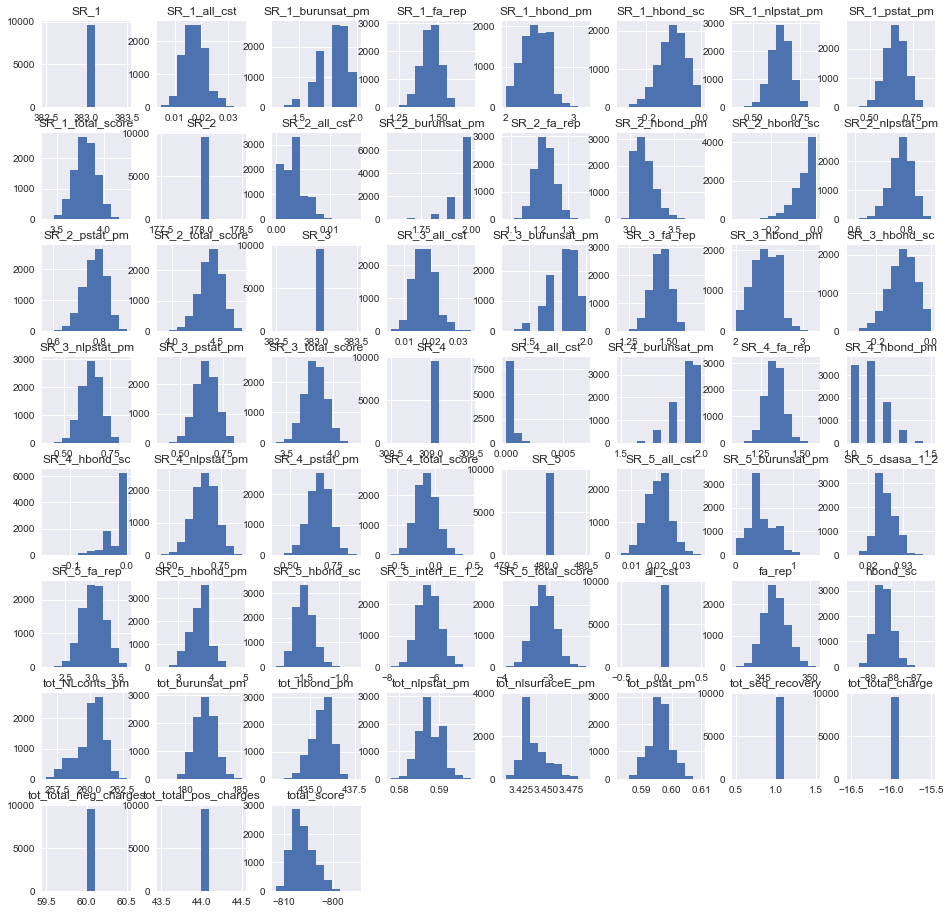

In [45]:
fig, ax = plt.subplots(figsize=(16,16))
df.hist(ax=ax)
fig.show()

NOw we clean this 

In [46]:
dropme = [n for n in df.columns if 'cst' in n]
for f in df.columns:
    if df[f].std() == 0:
        dropme.append(f)
dropme

['all_cst',
 'SR_1_all_cst',
 'SR_2_all_cst',
 'SR_3_all_cst',
 'SR_4_all_cst',
 'SR_5_all_cst',
 'all_cst',
 'tot_total_charge',
 'tot_total_pos_charges',
 'tot_total_neg_charges',
 'tot_seq_recovery',
 'SR_1',
 'SR_2',
 'SR_3',
 'SR_4',
 'SR_5']

In [55]:
scaler = preprocessing.StandardScaler()
drop = df.drop(dropme, axis=1)
df = pandas.DataFrame(scaler.fit_transform(drop), index=drop.index, columns=drop.columns)
df.head()

,total_score,fa_rep,hbond_sc,tot_pstat_pm,tot_nlpstat_pm,tot_burunsat_pm,tot_hbond_pm,tot_NLconts_pm,tot_nlsurfaceE_pm,SR_1_total_score,...,SR_4_burunsat_pm,SR_4_pstat_pm,SR_4_nlpstat_pm,SR_5_total_score,SR_5_fa_rep,SR_5_hbond_sc,SR_5_interf_E_1_2,SR_5_dsasa_1_2,SR_5_hbond_pm,SR_5_burunsat_pm
name,,,,,,,,,,,,,,,,,,,,,
M1A,1.433323,0.913916,-1.412001,1.049216,-0.366978,0.112070,1.443228,-1.893099,0.791025,-0.516086,...,1.036790,-0.232908,0.159167,0.176944,1.051100,-0.490304,0.183247,1.478975,1.684254,0.734866
M1R,-0.253864,0.678335,-1.319148,1.325562,-0.366978,-0.332872,-0.126370,0.444853,0.791025,0.992919,...,1.036790,0.486395,1.640955,-0.737655,0.044056,-1.045199,-0.731332,-0.702130,0.588174,-0.644588
M1N,-0.372376,1.696779,-0.504694,-0.608863,0.395452,-2.668821,2.315227,0.038253,-0.354999,0.125675,...,-0.009037,0.470410,0.610932,0.680393,1.559158,-1.520823,0.682490,-0.702130,0.588174,-0.184770
M1D,-0.801176,-0.936271,-1.059160,-0.056170,0.776668,-0.110401,0.571229,-0.571648,-0.928011,-0.862983,...,-0.009037,0.630256,-0.401021,-1.551564,-0.536582,-0.854949,-1.545224,0.024905,2.049614,0.275048
M1C,-0.121992,0.555738,-0.942430,-0.056170,-0.366978,-1.445229,1.268828,-0.571648,0.218013,1.027609,...,1.036790,1.429482,0.827779,1.179647,1.228013,-0.086023,1.175440,-0.338613,-0.142546,-0.644588


/Users/alex/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/alex/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


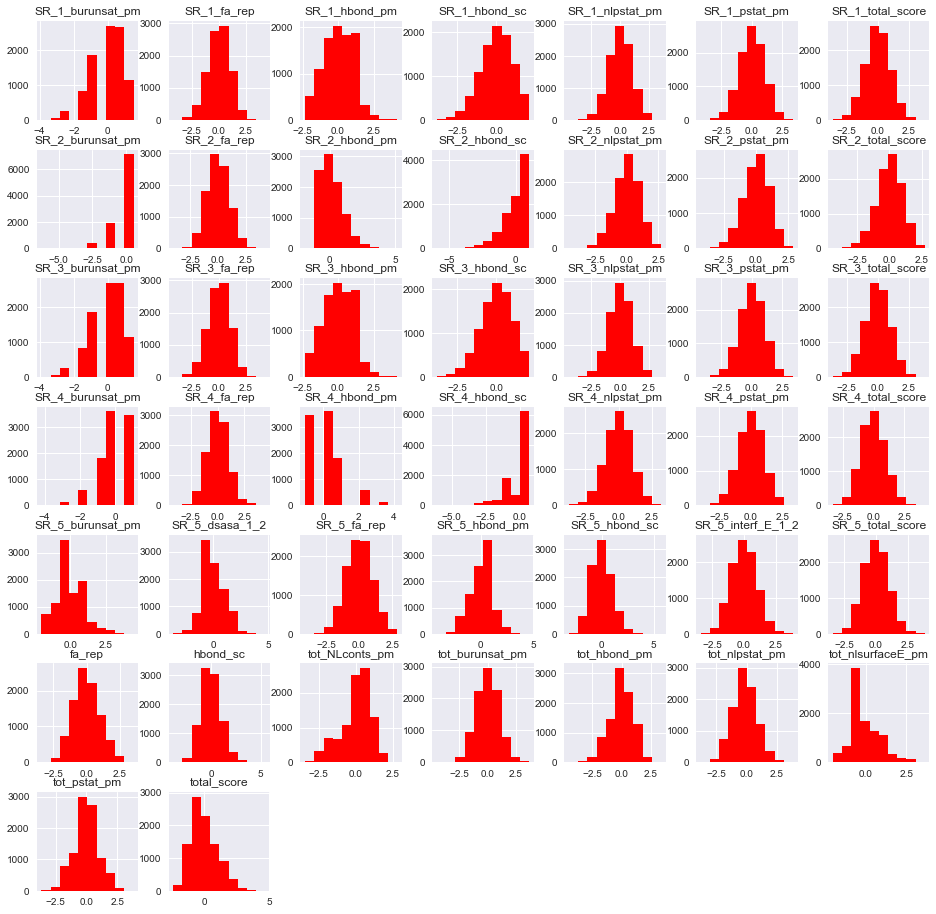

In [56]:
fig, ax = plt.subplots(figsize=(16,16))
df.hist(ax=ax, color='red')
fig.show()

Now we must join with data 

In [60]:
data = pandas.read_csv('../data_sets/beta_glu_DMS_log2enrichment.csv')
data.set_index(['pos', 'wtAA'], inplace=True)
data.head()

,,A,C,D,E,F,G,H,I,K,L,...,N,P,Q,R,S,T,V,W,Y,*
pos,wtAA,,,,,,,,,,,,,,,,,,,,,
1,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,V,-0.162,NaN,0.227,NaN,0.341,-0.242,NaN,-0.294,NaN,0.249,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN
3,P,-0.800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.530,...,NaN,0.005,-1.188,0.147,-1.258,-1.597,NaN,NaN,NaN,NaN
4,A,0.002,NaN,NaN,-1.840,NaN,0.591,NaN,NaN,NaN,NaN,...,NaN,0.267,NaN,NaN,-0.096,-1.922,-0.286,NaN,NaN,NaN
5,A,0.002,NaN,NaN,-1.294,NaN,-0.559,NaN,NaN,NaN,NaN,...,NaN,-0.309,NaN,NaN,-0.352,-1.416,-0.441,NaN,NaN,NaN


In [80]:
vals = []
for mutant_name in df.index:
#     print(mutant_name)
    native, *pos, designed = mutant_name 
    pos = int(''.join(pos))
#     print(native, pos, designed)
    try:
        val = data.loc[(pos, native), designed]
    except:
        val = None 
#     print(val) 
    vals.append(val)

In [82]:
df['data'] = vals

In [84]:
df.head(50)

,total_score,fa_rep,hbond_sc,tot_pstat_pm,tot_nlpstat_pm,tot_burunsat_pm,tot_hbond_pm,tot_NLconts_pm,tot_nlsurfaceE_pm,SR_1_total_score,...,SR_4_pstat_pm,SR_4_nlpstat_pm,SR_5_total_score,SR_5_fa_rep,SR_5_hbond_sc,SR_5_interf_E_1_2,SR_5_dsasa_1_2,SR_5_hbond_pm,SR_5_burunsat_pm,data
name,,,,,,,,,,,,,,,,,,,,,
M1A,1.433323,0.913916,-1.412001,1.049216,-0.366978,0.112070,1.443228,-1.893099,0.791025,-0.516086,...,-0.232908,0.159167,0.176944,1.051100,-0.490304,0.183247,1.478975,1.684254,0.734866,NaN
M1R,-0.253864,0.678335,-1.319148,1.325562,-0.366978,-0.332872,-0.126370,0.444853,0.791025,0.992919,...,0.486395,1.640955,-0.737655,0.044056,-1.045199,-0.731332,-0.702130,0.588174,-0.644588,NaN
M1N,-0.372376,1.696779,-0.504694,-0.608863,0.395452,-2.668821,2.315227,0.038253,-0.354999,0.125675,...,0.470410,0.610932,0.680393,1.559158,-1.520823,0.682490,-0.702130,0.588174,-0.184770,NaN
M1D,-0.801176,-0.936271,-1.059160,-0.056170,0.776668,-0.110401,0.571229,-0.571648,-0.928011,-0.862983,...,0.630256,-0.401021,-1.551564,-0.536582,-0.854949,-1.545224,0.024905,2.049614,0.275048,NaN
M1C,-0.121992,0.555738,-0.942430,-0.056170,-0.366978,-1.445229,1.268828,-0.571648,0.218013,1.027609,...,1.429482,0.827779,1.179647,1.228013,-0.086023,1.175440,-0.338613,-0.142546,-0.644588,NaN
M1E,-0.331005,0.064545,-0.135935,0.220177,-1.129409,0.445777,-0.300770,-0.469998,0.218013,0.472573,...,1.365544,1.442179,-0.897080,-0.173683,-0.878730,-0.894950,-1.429165,0.588174,-0.644588,NaN
M1Q,0.033152,1.203984,-0.374700,0.220177,1.157883,0.000835,0.048030,-0.368348,-0.928011,-0.654845,...,0.742147,0.972343,0.411887,0.751709,-0.418960,0.416087,0.024905,-0.507906,-1.104405,NaN
M1G,-0.552515,-0.279210,1.161355,-0.332516,-0.366978,0.779484,-0.300770,0.139903,-0.928011,1.261765,...,-0.424723,-0.455233,2.287235,0.887796,1.071329,2.289297,-1.065648,-1.969347,0.734866,NaN
M1H,0.311979,-0.858545,0.675866,2.154602,-0.366978,-1.000286,0.920029,1.156404,0.218013,0.784781,...,-0.520630,-0.654009,0.550336,-0.427712,0.952423,0.554533,0.388422,-0.142546,0.275048,NaN


/Users/alex/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/alex/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


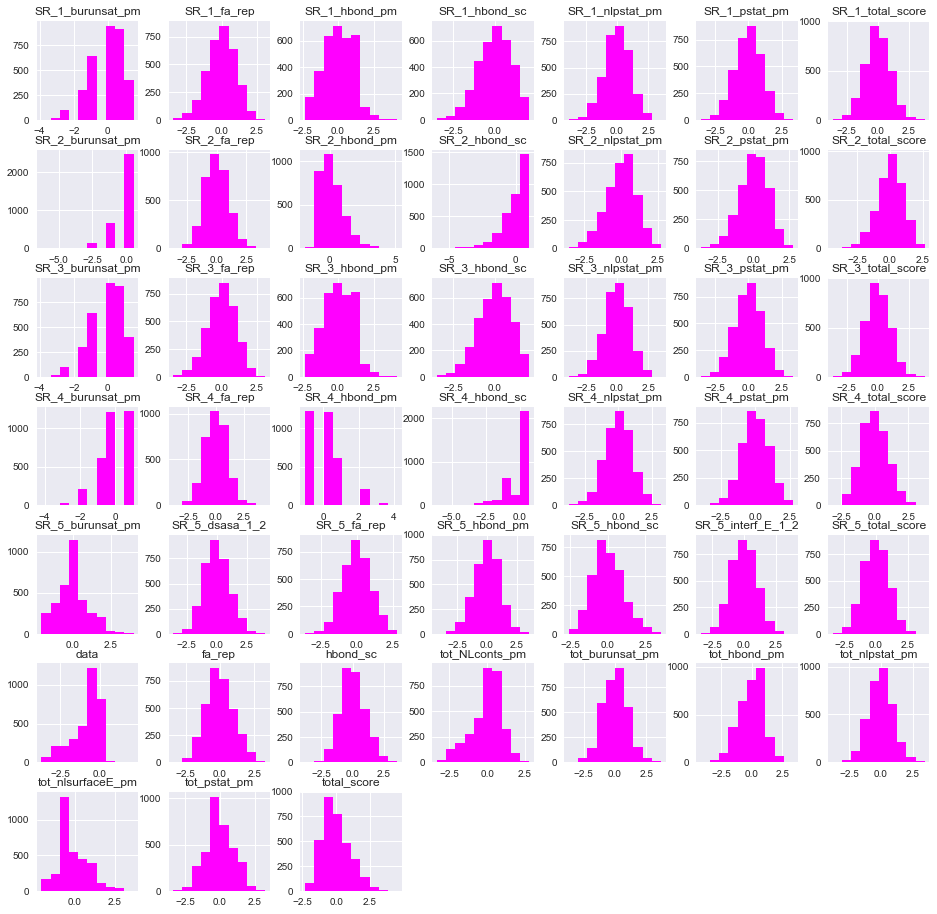

In [85]:
fig, ax = plt.subplots(figsize=(16,16))
df.hist(ax=ax, color='cyan')
df.dropna().hist(ax=ax, color='magenta')
fig.show()

In [87]:
df.dropna().to_csv('../feature_sets/bgl3_pnpg_enzyme_design.csv') 